In [138]:
import json
import os
from collections import Counter, defaultdict



In [137]:
with open("trex/re-nlg_0-10000.json") as f:
    trex = json.load(f)

In [152]:
types = {
    "http://www.wikidata.org/prop/direct/P31": ["is a", "has type"],
    "http://www.wikidata.org/prop/direct/P47": ["shares a border with", "is bordered by", "adjacent to"],
    "http://www.wikidata.org/prop/direct/P361": ["is part of"],
    "http://www.wikidata.org/prop/direct/P30": ["is in the continent of"],
    "http://www.wikidata.org/prop/direct/P17": ["is in the country of"],
    "http://www.wikidata.org/prop/direct/P37": ["is the official language of"],
}

questions = {
    "http://www.wikidata.org/prop/direct/P31": ["Is $s a $p? TRUE", "Is $s a type of $p? TRUE", "What is a $s? A $p"],
    "http://www.wikidata.org/prop/direct/P47": ["Does $s share a border with $p? TRUE", "Is $s bordered by $p? TRUE", "Is $s adjacent to $p? TRUE", "What borders $s? (SET)$p"],
    "http://www.wikidata.org/prop/direct/P361": ["Is $s part of $p? TRUE", "What are parts of $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P279": ["Is $s a type of $p? TRUE"],
    "http://www.wikidata.org/prop/direct/P30": ["Is $s in the continent of $p? TRUE", "What countries are in $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P17": ["Is $s in the country of $p? TRUE", "What is in $p? (SET)$s", "Where is $s? $p"],
    "http://www.wikidata.org/prop/direct/P37": ["Is $p a language of $s? TRUE", "Is $p an official langauge of $s? TRUE", "What languages are spoken in $s? (SET)$p", "Where is $p spoken? (SET)$s"],
}


new_questions = {
    "http://www.wikidata.org/prop/direct/P31": [
        "Is $s a $o? TRUE",
        "Is $s a type of $o? TRUE",
        "What is a $s? A $o"],
    "http://www.wikidata.org/prop/direct/P47":
        ["Does $s share a border with $o? TRUE",
         "Does $o share a border with $s? TRUE"
         "Is $s bordered by $o? TRUE",
         "Is $s adjacent to $o? TRUE",
         "What borders $s? (SET)$o"],
    "http://www.wikidata.org/prop/direct/P361": [
        "Is $s part of $o? TRUE",
        "What are parts of $o? (SET)$s",
        "Where is $s? $o"],
    "http://www.wikidata.org/prop/direct/P279": [
        "Is $s a type of $p? TRUE"
    ],
    "http://www.wikidata.org/prop/direct/P30": [
        "Is $s in the continent of $o? TRUE",
        "What countries are in $o? (SET)$s",
        "Where is $s? $o"],
    "http://www.wikidata.org/prop/direct/P17": [
        "Is $s in the country of $o? TRUE",
        "What is in $o? (SET)$s",
        "Where is $s? $o"],
    "http://www.wikidata.org/prop/direct/P37": [
        "Is $o a language of $s? TRUE",
        "Is $o an official langauge of $s? TRUE",
        "What languages are spoken in $s? (SET)$o",
        "Where is $o spoken? (SET)$s"],

    "http://www.wikidata.org/prop/direct/P1056": ["Is $o produced by $s? TRUE",
                                                  "Does $s produce $o? TRUE",
                                                  "$s produces which items? (SET)$o",
                                                  "$o is produced by which manufacturer? $s",
                                                  "Who produces $o? $s"
                                                  ],
    "http://www.wikidata.org/prop/direct/P123": ["Is $o a publisher of $s? TRUE",
                                                 "Is $s published by $o? TRUE",
                                                 "What does $o publish? (SET)$s",
                                                 "Who publishes $s? $o"],
}

item_types = defaultdict(set)
type_items = defaultdict(set)

relations = defaultdict(list)
counter = Counter()
for idx, i in enumerate(trex):
    for trip in i['triples']:
        counter[trip['predicate']['uri']] += 1
        relations[trip['predicate']['uri']].append(trip)

        if trip["predicate"]['uri'] == "http://www.wikidata.org/prop/direct/P31":
            item_types[trip["object"]['surfaceform']].add(trip["subject"]['surfaceform'])
            item_types[trip["subject"]['surfaceform']].add(trip["object"]['surfaceform'])

created = []

qas = set()
for uri, count in counter.most_common(200):
    for trip in relations[uri]:
        if uri not in new_questions:
            #print(uri)
            continue

        for rel in new_questions[uri]:
            rel = rel.replace("$s",trip['subject']['surfaceform']).replace("$o",trip['object']['surfaceform'])
            created.append((rel, trip))

In [155]:
common_answer_true = {}
common_answer_sets = defaultdict(set)
for question, triple in created:
    if "?" not in question:
        print(question)
    q,a = question.rsplit("?",1)
    q = q.strip()
    a = a.strip()

    if "(SET)" in a:
        a = a.replace("(SET)","").strip()
        common_answer_sets[q].add(a)
    else:
        common_answer_true[q] = a

for question, triple in created:
    item_type = item_types[triple["object"]["surfaceform"]]
    #print([item_types[t] for t in item_type])

print(common_answer_sets)


defaultdict(<class 'set'>, {'What is in Cambodia': {'Central Khmer', 'Khmer language', 'Geography of Cambodia', 'Foreign relations of Cambodia', 'Mekong', 'Bassac River', 'Politics of Cambodia', 'Economy of Cambodia', 'Mekong River', 'Khmer', 'Democratic Kampuchea'}, 'What is in American': {'Ford', 'Nature Conservancy', 'APA', 'Santa Clara, California', 'Canada–United States relations', 'Professional Karate Association (PKA)', 'Chicago Cubs', 'NASCAR', 'Inter-American Development Bank', 'Houston Astros', 'Ford Motor Company', 'Washington, D.C.', 'Chicago', 'Manhattan Project', 'Turing Award', 'Beekman', 'Akron, Ohio', 'Chrysler Corporation', 'Attorney General', 'Houston, Texas', 'Hispanic', 'American Revolution', 'Northrop', 'Megaforce Records', 'Cleveland Indians', 'National Space Society', 'Major League Baseball', 'Greeneville, Tennessee', 'Lenox Hill', 'Texas', 'New York', 'Paramount Pictures', 'American Southwest', 'Phoenix, Arizona', "Hawai'i", 'Marvel Comics', 'Grammy Award', 'Ya

In [146]:
        #if trip['predicate']['surfaceform'] is not None:
            #print("{} {} {}".format(trip['subject']['surfaceform'],trip['predicate']['surfaceform'], trip['object']['surfaceform']))

        if trip['predicate']['uri'] in types:
            rel = types[trip['predicate']['uri']]
            for re in rel:
                pass
                #print("{} {} {}".format(trip['subject']['surfaceform'], re, trip['object']['surfaceform']))
        else:
            #print(trip['predicate']['uri'])
            pass

        if trip['predicate']['uri'] in questions:
            rel = questions[trip['predicate']['uri']]
            #for re in rel:
                #print(re.replace("$s",trip['subject']['surfaceform']).replace("$p",trip['object']['surfaceform']))


    #print(i['entities'])
    #print(i['entities'][0].keys())
    #for entity in i['entities']:
    #    print(entity['boundaries'])

print(len(trex))

IndentationError: unexpected indent (<ipython-input-146-0f573587d1dd>, line 5)

417
[('http://www.wikidata.org/prop/direct/P17', 8318), ('http://www.wikidata.org/prop/direct/P47', 7763), ('http://www.wikidata.org/prop/direct/P31', 5462), ('http://www.wikidata.org/prop/direct/P279', 4409), ('http://www.wikidata.org/prop/direct/P27', 3301), ('http://www.wikidata.org/prop/direct/P131', 3058), ('http://www.wikidata.org/prop/direct/P530', 3049), ('http://www.wikidata.org/prop/direct/P361', 2767), ('http://www.wikidata.org/prop/direct/P106', 2719), ('http://www.wikidata.org/prop/direct/P527', 2333), ('http://www.wikidata.org/prop/direct/P569', 2153), ('http://www.wikidata.org/prop/direct/P570', 1915), ('http://www.wikidata.org/prop/direct/P463', 1835), ('http://www.wikidata.org/prop/direct/P37', 1511), ('http://www.wikidata.org/prop/direct/P1411', 1460), ('http://www.wikidata.org/prop/direct/P150', 1436), ('http://www.wikidata.org/prop/direct/P1412', 1074), ('http://www.wikidata.org/prop/direct/P136', 1013), ('http://www.wikidata.org/prop/direct/P138', 995), ('http://ww

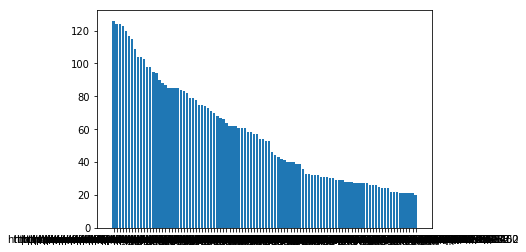

In [65]:
print(len(counter))
print(counter.most_common(100))

import matplotlib.pyplot as plt
rns = []
vs = []
for k,v in counter.most_common(200)[100:]:
    rns.append(k)
    vs.append(v)

plt.bar(rns,vs)
plt.show()
